In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
file_path = '/content/drive/MyDrive/Unified Mentor/netflix1.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
data.shape

(8790, 10)

In [9]:
data=data.drop_duplicates()

In [10]:
data['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


Text(0.5, 0.98, 'Total Content on Netflix')

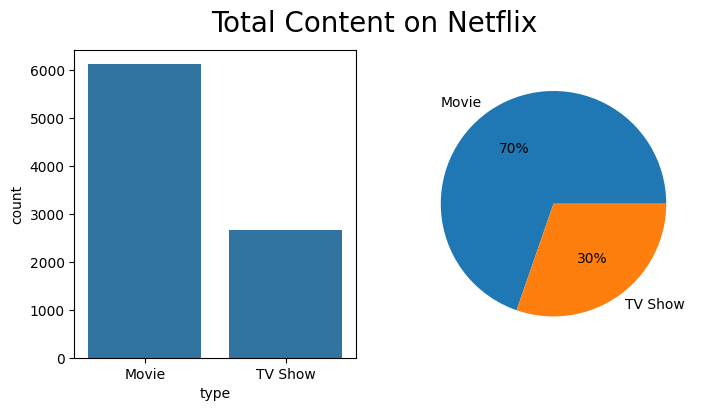

In [11]:
freq=data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [13]:
data['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


Text(0.5, 0.98, 'Rating on Netflix')

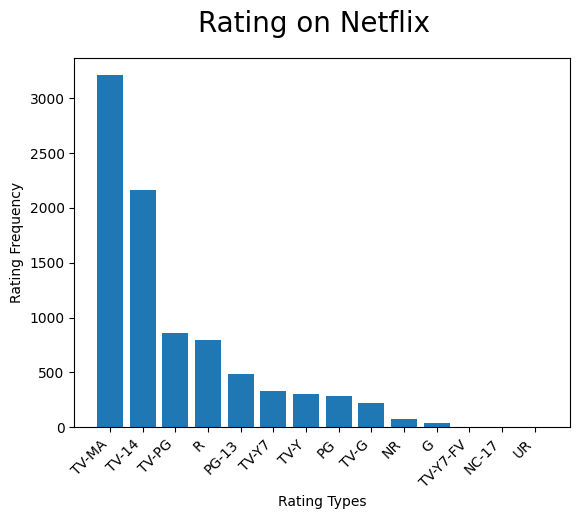

In [14]:
ratings=data['rating'].value_counts().reset_index().sort_values         (by='count', ascending=False)

plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

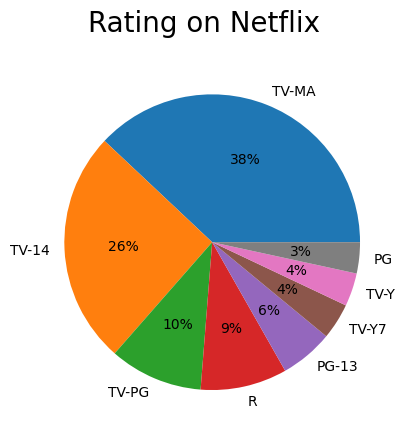

In [15]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],
autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [16]:
# lets convert column date_added to datetime.
data['date_added']=pd.to_datetime(data['date_added'])

In [17]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [18]:
data['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Luxembourg,1
Senegal,1
Belarus,1


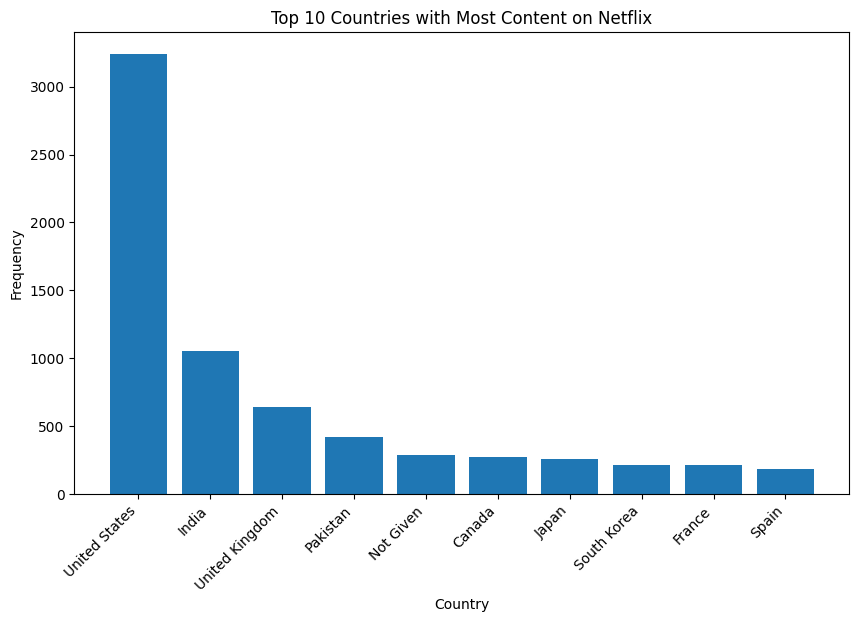

In [20]:
import matplotlib.pyplot as plt

# Count occurrences of each country and reset index
top_ten_countries = data['country'].value_counts().reset_index()
top_ten_countries.columns = ['country', 'count']  # Rename columns correctly

# Sort by count and select top 10
top_ten_countries = top_ten_countries.sort_values(by='count', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top 10 Countries with Most Content on Netflix")  # Changed to plt.title()
plt.show()

In [21]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

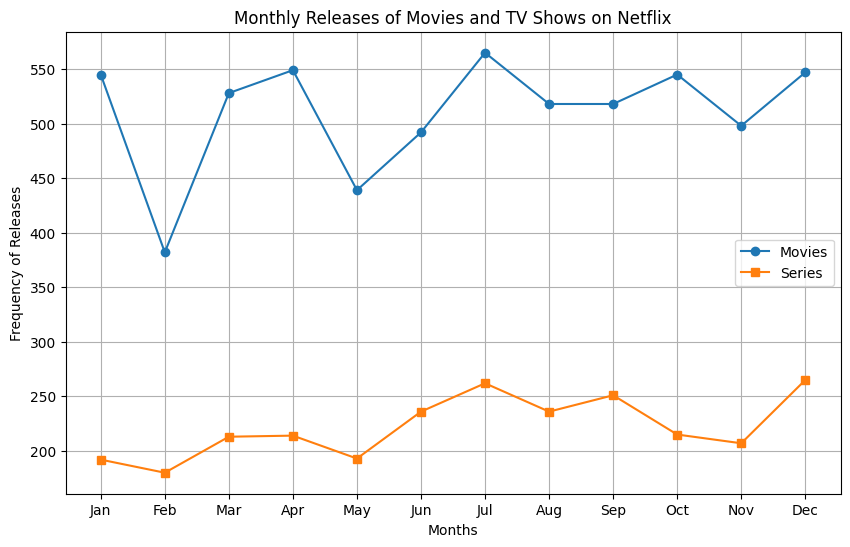

In [22]:
import matplotlib.pyplot as plt

# Count monthly releases for movies
monthly_movie_release = data[data['type'] == 'Movie']['month'].value_counts().sort_index()

# Count monthly releases for TV shows
monthly_series_release = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

# Plot the monthly release trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series', marker='s')

# Labels and titles
plt.xlabel("Months")
plt.ylabel("Frequency of Releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.title("Monthly Releases of Movies and TV Shows on Netflix")

# Show the plot
plt.show()

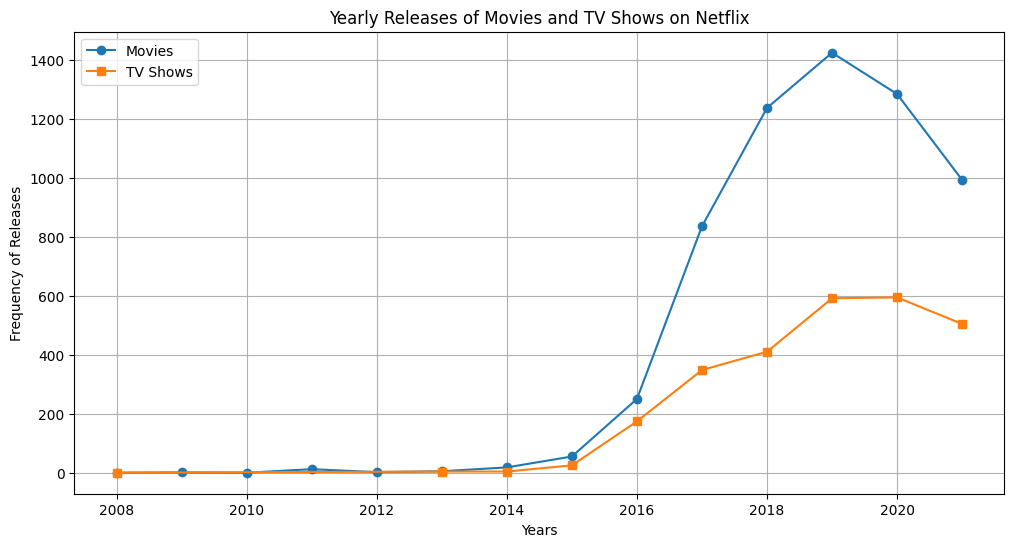

In [23]:
import matplotlib.pyplot as plt

# Count yearly releases for movies
yearly_movie_releases = data[data['type'] == 'Movie']['year'].value_counts().sort_index()

# Count yearly releases for TV shows
yearly_series_releases = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()

# Plot the yearly release trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies', marker='o')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows', marker='s')

# Labels and title
plt.xlabel("Years")
plt.ylabel("Frequency of Releases")
plt.grid(True)
plt.title("Yearly Releases of Movies and TV Shows on Netflix")
plt.legend()

# Show the plot
plt.show()

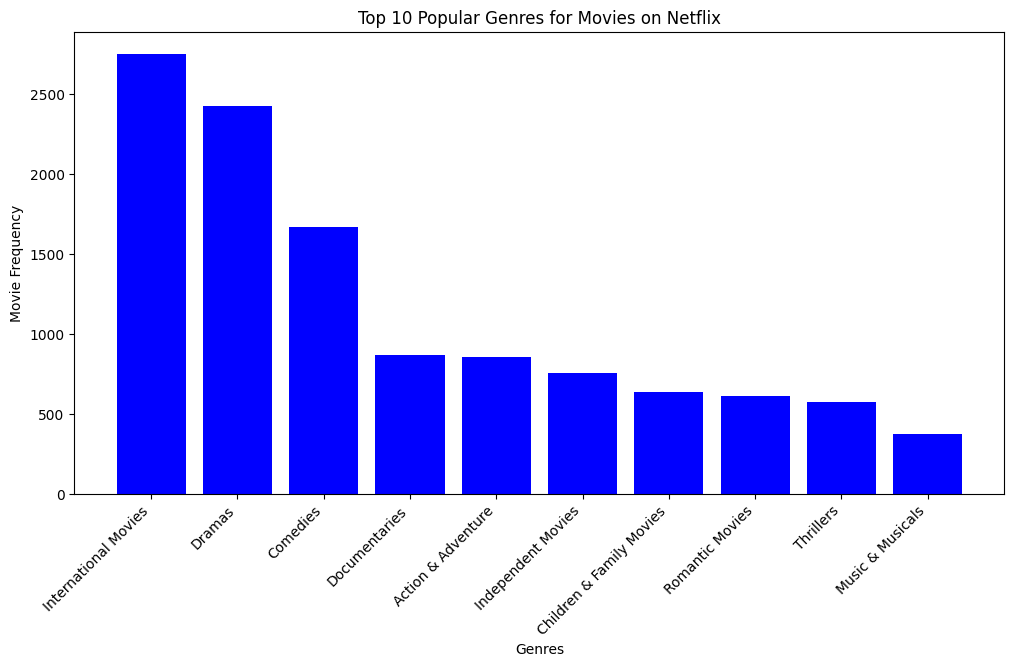

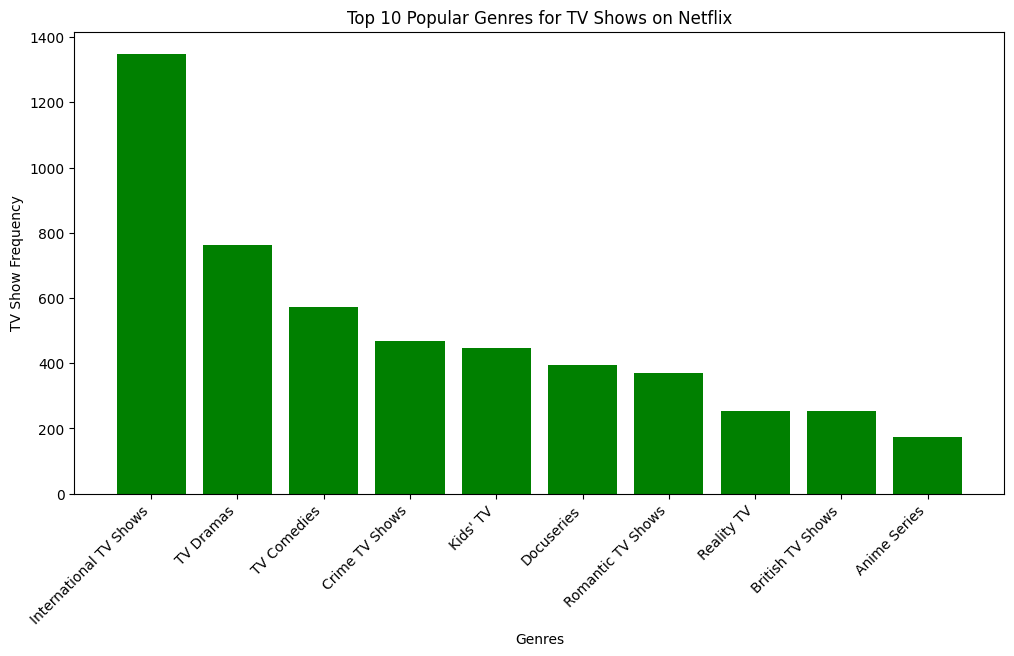

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Split multiple genres into individual rows
data_expanded = data.assign(listed_in=data['listed_in'].str.split(', ')).explode('listed_in')

# Count popular movie genres
popular_movie_genre = data_expanded[data_expanded['type'] == 'Movie'].groupby("listed_in").size().sort_values(ascending=False).head(10)

# Count popular TV show genres
popular_series_genre = data_expanded[data_expanded['type'] == 'TV Show'].groupby("listed_in").size().sort_values(ascending=False).head(10)

# Plot Movie Genres
plt.figure(figsize=(12, 6))
plt.bar(popular_movie_genre.index, popular_movie_genre.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movie Frequency")
plt.title("Top 10 Popular Genres for Movies on Netflix")
plt.show()

# Plot TV Show Genres
plt.figure(figsize=(12, 6))
plt.bar(popular_series_genre.index, popular_series_genre.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Show Frequency")
plt.title("Top 10 Popular Genres for TV Shows on Netflix")
plt.show()

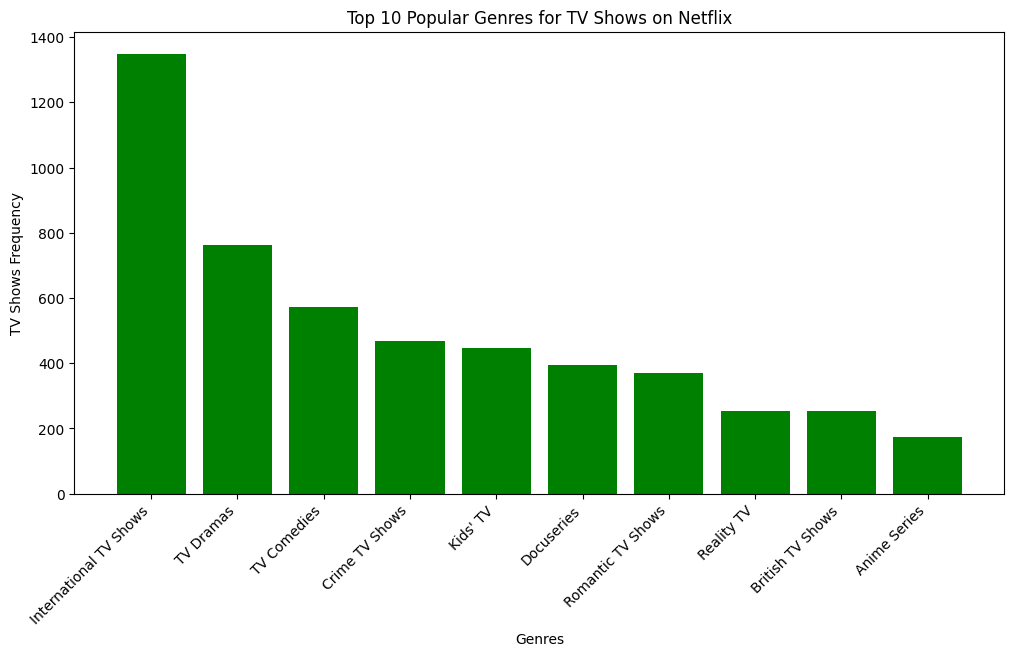

In [25]:
import matplotlib.pyplot as plt

# Plot TV Show Genres
plt.figure(figsize=(12, 6))
plt.bar(popular_series_genre.index, popular_series_genre.values, color='green')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.title("Top 10 Popular Genres for TV Shows on Netflix")

# Show the plot
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

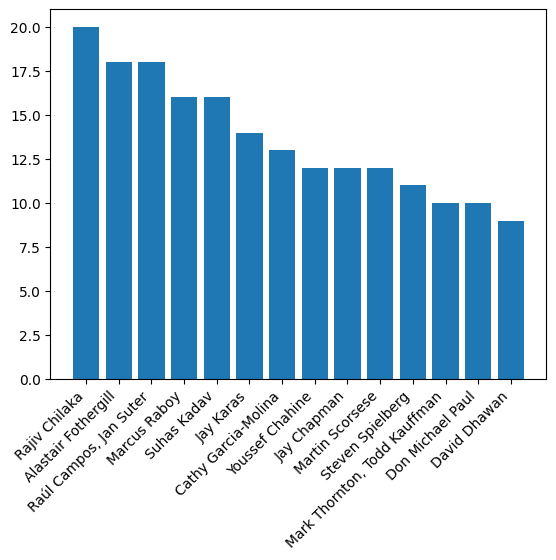

In [27]:
directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')